In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from scipy import stats
import warnings
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
        
warnings.filterwarnings('ignore')

# 设置字体路径
font_path = "/usr/share/fonts/winfonts/simhei.ttf"  
font = FontProperties(fname=font_path)

In [2]:
songs_information = pd.read_csv('/home/python_crawler/music_website/data/song_information_new.csv')
lyrics = songs_information['lyric'].dropna()

In [3]:
# 中文字符的正则表达式
chinese_pattern = re.compile(r'[\u4e00-\u9fff]')

# 提取中文字符
all_chinese_text = ""
for lyric in lyrics:       
        chinese_chars = chinese_pattern.findall(str(lyric))
        all_chinese_text += ''.join(chinese_chars)
chinese_chars = list(all_chinese_text)

In [4]:
# 统计字符出现次数
char_counter = Counter(chinese_chars)
char_counts = pd.DataFrame(
    list(char_counter.items()), 
    columns=['Character', 'Counts']
    ).sort_values('Counts', ascending=False)
        

total_chars = sum(char_counter.values())
char_counts['Frequency'] = char_counts['Counts'] / total_chars
        
print(f"共有 {len(char_counts)} 个不同的汉字")
print(f"总字符数: {total_chars}")

top_n = 20
print(f"\n出现频率最高的 {top_n} 个汉字:")
print(char_counts.head(top_n).to_string(index=False))

共有 5777 个不同的汉字
总字符数: 3147333

出现频率最高的 20 个汉字:
Character  Counts  Frequency
        的  116370   0.036974
        我  107021   0.034004
        你   84455   0.026834
        不   65239   0.020728
        一   50468   0.016035
        是   41840   0.013294
        在   35921   0.011413
        有   32614   0.010362
        了   27322   0.008681
        爱   24862   0.007899
        人   23234   0.007382
        想   20816   0.006614
        心   20383   0.006476
        着   19323   0.006139
        天   18985   0.006032
        要   18321   0.005821
        过   17958   0.005706
        会   17538   0.005572
        就   17481   0.005554
        来   17251   0.005481


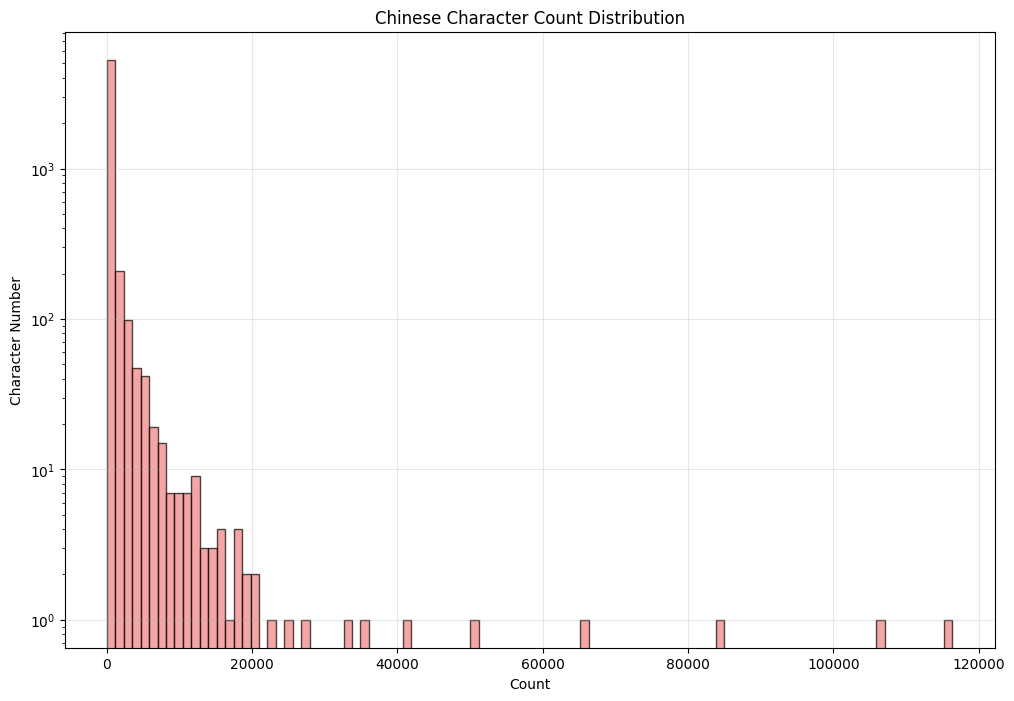

In [17]:
"""绘制字符出现次数分布直方图""" 
plt.figure(figsize=(12, 8))
bins = 100

# 绘制直方图
counts = char_counts['Counts']
# plt.subplot(2, 2, 1)
# plt.hist(counts, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
# plt.xlabel('Times')
# plt.ylabel('Character Number')
# plt.title('汉字出现次数分布直方图')
# plt.grid(True, alpha=0.3)
        
# 对数坐标直方图
# plt.subplot(2, 2, 2)
plt.hist(counts, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Character Number')
plt.title('Chinese Character Count Distribution')
plt.yscale('log')
plt.grid(True, alpha=0.3)


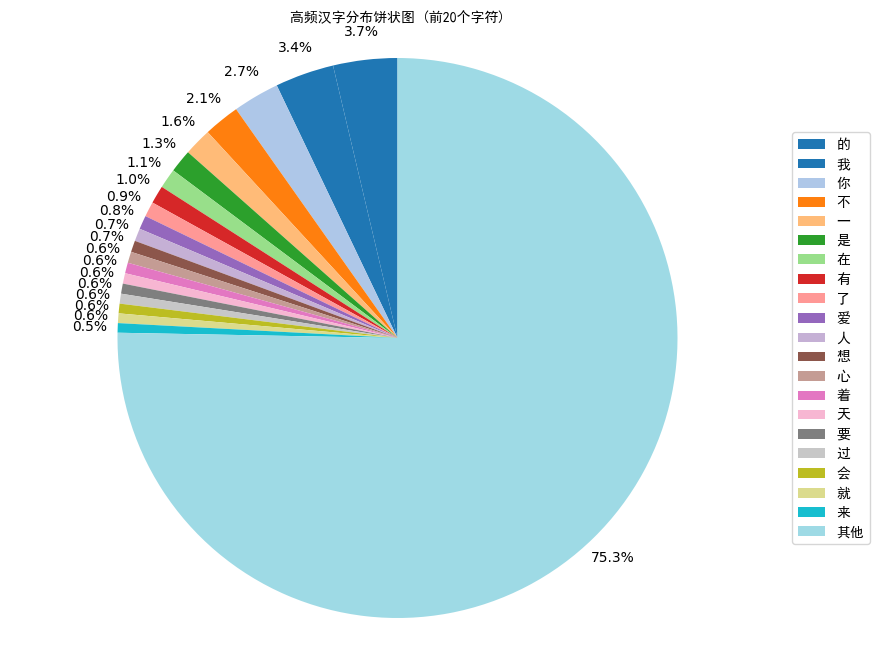

In [53]:
# 高频汉字分布饼状图
plt.figure(figsize=(10, 8))

top_n = 20
top_chars = char_counts.head(top_n)
others_count = char_counts.iloc[top_n:]['Counts'].sum()
        
# 准备数据
labels = top_chars['Character'].tolist() + ['其他']
sizes = top_chars['Counts'].tolist() + [others_count]
        
# 生成颜色
colors = plt.cm.tab20(np.linspace(0, 0.95, len(labels)))
        
# 创建带连线的标签
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%'
    return my_autopct
    
wedges, texts, autotexts = plt.pie(sizes, autopct=make_autopct(sizes), 
                                      colors=colors, startangle=90,
                                      pctdistance=1.1)

# 添加带连线的标签
plt.legend(wedges, labels, loc="center left", 
              bbox_to_anchor=(1, 0, 0.5, 1), prop=font)
plt.title(f'高频汉字分布饼状图 (前{top_n}个字符)', fontproperties=font)
plt.axis('equal')
plt.show()

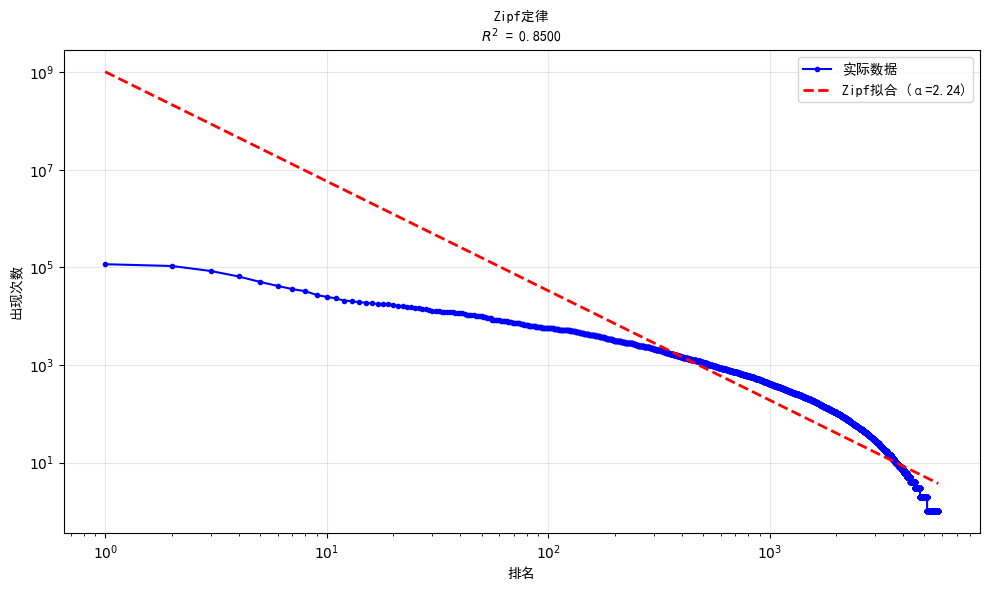

In [71]:
counts = char_counts['Counts'].values
results = []         
# 绘制Zipf定律验证
plt.figure(figsize=(10, 6))
sorted_counts = np.sort(counts)[::-1]
ranks = np.arange(1, len(sorted_counts) + 1)
        
plt.loglog(ranks, sorted_counts, 'bo-', markersize=3, label='实际数据')
        
# 拟合Zipf定律 (power law)
log_ranks = np.log(ranks)
log_counts = np.log(sorted_counts)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_ranks, log_counts)
        
fitted_counts = np.exp(intercept) * ranks ** slope
plt.loglog(ranks, fitted_counts, 'r--', linewidth=2, 
                          label=f'Zipf拟合 (α={-slope:.2f})')
        
plt.xlabel('排名', fontproperties=font)
plt.ylabel('出现次数', fontproperties=font)
plt.title(f'Zipf定律\n$R^2$ = {r_value**2:.4f}', fontproperties=font)
plt.legend(prop=font)
plt.grid(True, alpha=0.3)
        
plt.tight_layout()
plt.show()